<a href="https://colab.research.google.com/github/dnjswnsthd/bnk_py/blob/develop/3_DT_lab_ipynb%EC%9D%98_SWJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Decision Tree & Ensemble</h1>

<h1>Decision Tree</h1>


# import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_digits, load_boston, load_breast_cancer

# 심장병 분류
가슴통증, 혈액순환, 동맥경화를 조건으로 심장병을 분류하는 예제

*  dataset

가슴통증 | 혈액순환 | 동맥경화| 심장질환
---|---|---|---
yes | yes | yes| yes
yes | yes | no| no
no | no | yes | no
no| yes|yes | no
yes|yes|no|no
yes |no|yes| no
no|no|yes|no
no| yes| no| no

# Gini

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
data = np.array([[1,1,1,1],
                 [1,1,0,0],
                 [0,0,1,0],
                 [0,1,1,0],
                 [1,1,0,0],
                 [1,0,1,0],
                 [0,0,1,0],
                 [0,1,0,0]])
X = data[:, :-1]
y = data[:, -1]
print(X, y)

dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X, y)
y_pred = dt.predict(X)
print(y_pred)
print('acc:', accuracy_score(y, y_pred))

[[1 1 1]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [1 1 0]
 [1 0 1]
 [0 0 1]
 [0 1 0]] [1 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0]
acc: 1.0


# 트리 시각화
* grphviz
    * 실행파일 설치 : https://graphviz.gitlab.io/download/
    * `pip install python-graphviz`

In [3]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cach

In [8]:
import matplotlib.font_manager as fm
fm.findSystemFonts()

['/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype

In [6]:
plt.rc('font', family='NanumGothic')

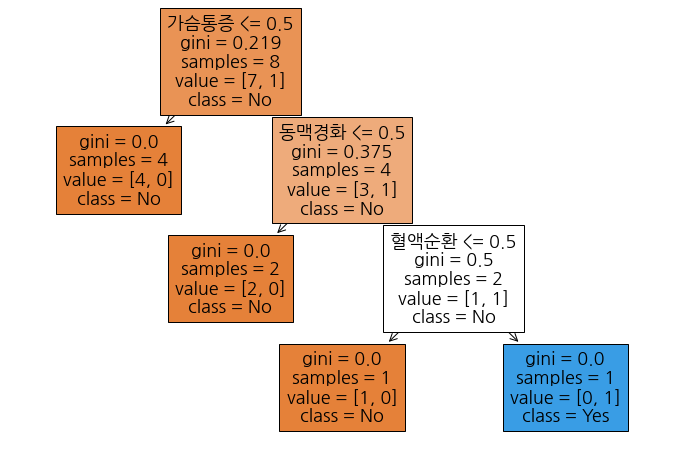

In [7]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))

#_ = plot_tree(dt)
_ = plot_tree(dt, feature_names=["가슴통증", "혈액순환", "동맥경화"], class_names=["No", "Yes"], filled=True)

# Entropy
$  \displaystyle -\sum_{i=1}^m p_i \cdot log(p_i) = \sum_{i=1}^m p_i \cdot -log(p_i)$ 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log2
  """


Text(0, 0.5, '$-log_2(p)$')

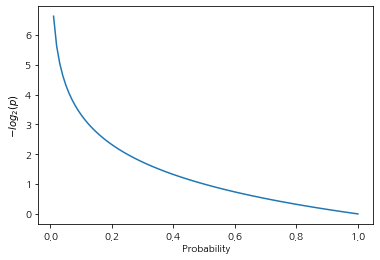

In [8]:
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(0, 1, 100)
log_p = -np.log2(p)

plt.plot(p, log_p)
plt.xlabel('Probability')
plt.ylabel('$-log_2(p)$')

## entropy 실습

In [10]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier


data = np.array([[1,1,1,1],
                 [1,1,0,0],
                 [0,0,1,0],
                 [0,1,1,0],
                 [1,1,0,0],
                 [1,0,1,0],
                 [0,0,1,0],
                 [0,1,0,0]])

X = data[:, :-1]
y = data[:, -1]
print(X, y)

dt_ent = DecisionTreeClassifier(criterion='entropy')
dt_ent.fit(X, y)
y_pred = dt_ent.predict(X)
acc = accuracy_score(y, y_pred)
print(y_pred)
print('acc:', acc)

[[1 1 1]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [1 1 0]
 [1 0 1]
 [0 0 1]
 [0 1 0]] [1 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0]
acc: 1.0


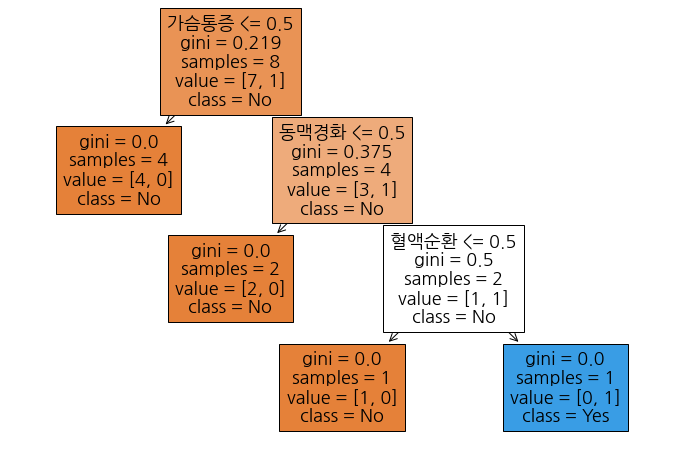

In [11]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
_ = plot_tree(dt, feature_names=["가슴통증", "혈액순환", "동맥경화"], class_names=["No", "Yes"], filled=True)

# Max Depth
### Breaset Cancer

In [14]:
from sklearn import model_selection
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

seed = 42
cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = model_selection.train_test_split(cancer.data,
                                                        cancer.target,
                                                        stratify=cancer.target,
                                                        random_state=seed
                                                        )
max_depth = [None, 4]

for d in max_depth:
  tree = DecisionTreeClassifier(max_depth=d, random_state=seed)
  tree.fit(X_train, y_train)
  print('train:', tree.score(X_train, y_train), 'Test', tree.score(X_test, y_test))
  print('==========================================================')

train: 1.0 Test 0.9230769230769231
train: 0.9882629107981221 Test 0.9440559440559441


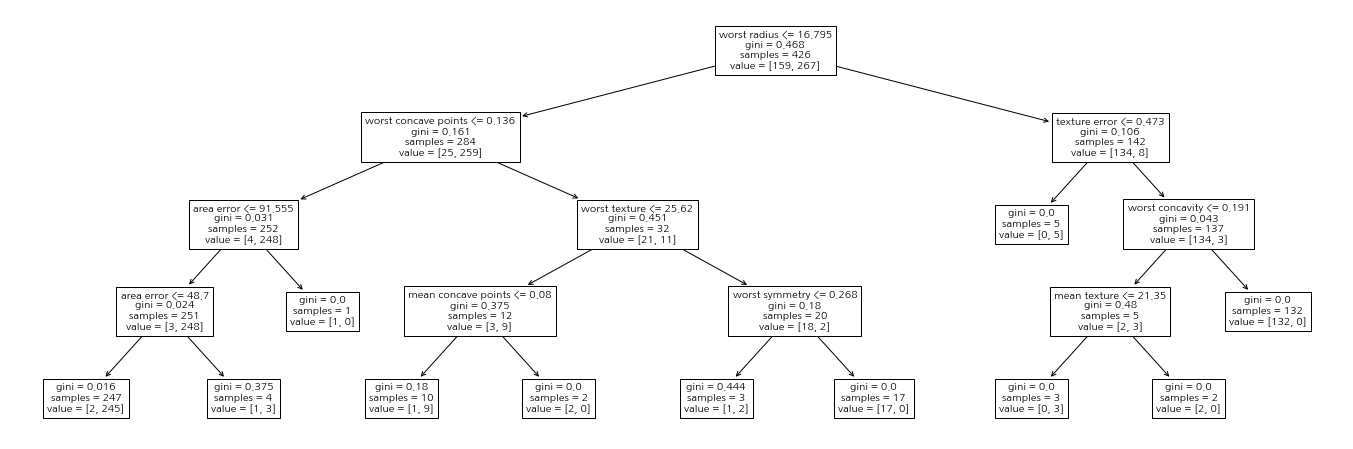

In [15]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,8))
_ = plot_tree(tree, feature_names=cancer.feature_names)

## Feature importances 시각화

[0.         0.01258462 0.         0.         0.         0.
 0.         0.0141577  0.         0.         0.         0.04839825
 0.         0.01261296 0.         0.         0.         0.
 0.         0.         0.72682851 0.03323127 0.         0.
 0.         0.         0.018188   0.1221132  0.01188548 0.        ]


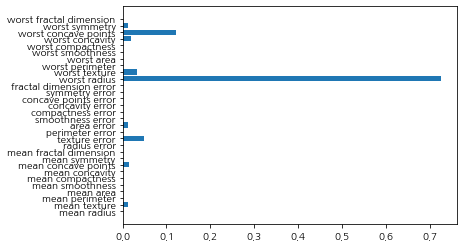

In [22]:
print(tree.feature_importances_)
n = len(cancer.feature_names)
plt.barh(range(n), tree.feature_importances_)
plt.yticks(np.arange(n), cancer.feature_names);

# Regression Tree(회귀 트리)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


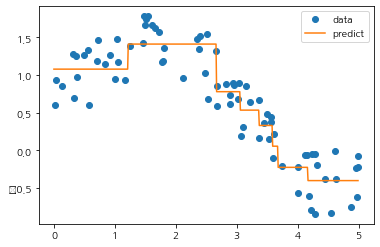

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

n = 80
X = np.sort(5 * np.random.rand(n, 1), axis=0)
y = np.sin(X).ravel() + np.random.rand(n)

regtree = DecisionTreeRegressor(max_depth=3)
regtree.fit(X,y)

X_test = np.arange(0, 5, 0.01).reshape(-1, 1)
y_pred = regtree.predict(X_test)
plt.plot(X, y, 'o', label='data')
plt.plot(X_test, y_pred, label='predict')
plt.legend();

## Regression Tree 보스턴 주택 가격

In [27]:
boston = load_boston()
X = StandardScaler().fit_transform(boston.data)

X_train, X_test, y_train, y_test = train_test_split(X, boston.target, random_state=1)
regtree = DecisionTreeRegressor(max_depth=5)
regtree.fit(X_train, y_train)

print('train:', regtree.score(X_train, y_train), 'test:', regtree.score(X_test, y_test))


train: 0.9204825770764915 test: 0.8763987309111113


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# Ensemble(앙상블) 기법


## Voting
* 유방암 데이터 실습

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

cancer = datasets.load_breast_cancer()
X = StandardScaler().fit_transform(cancer.data)
X_train, X_test, y_train, y_test = train_test_split(X, cancer.target, random_state=0)

lr = LogisticRegression()
knn = KNeighborsClassifier(8)
dt = DecisionTreeClassifier(max_depth=5)

voting = VotingClassifier([('lr', lr), ('knn', knn), ('dt', dt)], voting='soft')

for cl in [lr, knn, dt, voting]:
  cl.fit(X_train, y_train)
  name = cl.__class__.__name__
  print(name, 'Train:', cl.score(X_train, y_train), 'Test:', cl.score(X_test, y_test))

LogisticRegression Train: 0.9906103286384976 Test: 0.965034965034965
KNeighborsClassifier Train: 0.971830985915493 Test: 0.9440559440559441
DecisionTreeClassifier Train: 0.9929577464788732 Test: 0.9020979020979021
VotingClassifier Train: 0.9906103286384976 Test: 0.965034965034965


## Bagging, RandomForest
* 숫자 손글씨 실습

In [37]:
from sklearn.ensemble import RandomForestClassifier

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

df = DecisionTreeClassifier(max_depth=10, random_state=0)
forest = RandomForestClassifier(300, random_state=0, max_depth=10)

for clf in [dt, forest]:
  clf.fit(X_train, y_train)
  name = clf.__class__.__name__
  print(f'{name}, train:{clf.score(X_train, y_train)}, Test: {clf.score(X_test, y_test)}')

DecisionTreeClassifier, train:0.7052709725315516, Test: 0.6666666666666666
RandomForestClassifier, train:1.0, Test: 0.9777777777777777


## Boosting


### Boosting 숫자 손글씨 실습

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

digits = load_digits()
X = MinMaxScaler().fit_transform(digits.data)
X_train, X_test, y_train, y_test = train_test_split(X, digits.target, random_state=1)



AdaBoostClassifier	 Train Acc : 1.0000,  Test Acc : 0.9800
GradientBoostingClassifier	 Train Acc : 1.0000,  Test Acc : 0.9556


### Boosting 보스턴 주택가격 실습

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

boston = load_boston()
X = StandardScaler().fit_transform(boston.data)
X_train, X_test, y_train, y_test = train_test_split(X, boston.target, random_state=1)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

AdaBoostRegressor Train R2:0.9156, Test R2:0.8624
GradientBoostingRegressor Train R2:0.9809, Test R2:0.9248


## Stacking
### 유방암 데이터 실습

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import StackingClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)


StackingClassifier: 0.9650
KNeighborsClassifier: 0.9231
RandomForestClassifier: 0.9720
DecisionTreeClassifier: 0.8881
AdaBoostClassifier: 0.9860


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
knn = KNeighborsClassifier(4)
rf = RandomForestClassifier(n_estimators=100, random_state=0)
dt = DecisionTreeClassifier()
ada = AdaBoostClassifier(n_estimators=100)
for m in  [knn, rf, dt, ada]:
  m.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)
ada_pred = ada.predict(X_test)

print(f'KNN Accuracy: {accuracy_score(y_test, knn_pred):.4f}')
print(f'RandomForest Accuracy: {accuracy_score(y_test, rf_pred):.4f}')
print(f'DTree Accuracy: {accuracy_score(y_test, dt_pred):.4f}')
print(f'AdaBoost Accuracy: {accuracy_score(y_test, ada_pred):.4f}')
preds = np.array([knn_pred, rf_pred, dt_pred, ada_pred]).T
lr = LogisticRegression(C=10)
lr.fit(preds, y_test)
print(f'Final Accuracy: {lr.score(preds, y_test):.4f}')


KNN Accuracy: 0.9231
RandomForest Accuracy: 0.9720
DTree Accuracy: 0.8811
AdaBoost Accuracy: 0.9860
Final Accuracy: 0.9860


## XGBoost(eXtra Gradient Boost)
* GBM의 단점인 느린 수행 시간 해결
* 과적합 규제(Regularization) 가능
* 자체적인 교차 검증 수행
* 설치 : `pip install xgboost`
* 별도의 패키지이지만 sklearn용 래퍼(wrapper) 제공
  * `XGBClassifier`, `XGBRegressor` 
* https://xgboost.readthedocs.io/en/latest/index.html
* https://github.com/dmlc/xgboost

### XGBoost 위스콘신 유방암 분류

In [ ]:
import xgboost as xgb

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

model = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=400)
model.fit(X_train, y_train)
print('Train acc: ',model.score(X_train, y_train), 'Test acc: ', model.score(X_test, y_test))

Train acc:  1.0 Test acc:  0.986013986013986


### XGBoost boston 주택 가격 회귀

In [ ]:
import xgboost as xgb

boston = load_boston()
X = StandardScaler().fit_transform(boston.data)
X_train, X_test, y_train, y_test = train_test_split(X, boston.target, random_state=0)

model = xgb.XGBRegressor()
model.fit(X_train, y_train)

print(f'Train R2:{model.score(X_train, y_train):.4f} Test R2:{model.score(X_test, y_test):.4f}')

[03:44:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train R2:0.9805 Test R2:0.7669


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

## LightGBM
* 여전히 오래 걸리는 XGBoost 개선
  * 빠른 학습과 예측
  * 적은 메모리 사용
* 단점 : 적은 데이터 학습에서 과접한 발생이 쉽다.
  * 10,000건 이상의 샘플 권장
* 설치 : `pip install lightgbm`
* sklearn 래퍼 클래스
  * `LGBMClassifier`, `LGBMRegressor`
* 참조 : https://lightgbm.readthedocs.io/en/latest/


###### LGBM 유방암분류

In [ ]:
from lightgbm import LGBMClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

lgbm_clf = LGBMClassifier(n_estimator=400)
lgbm_clf.fit(X_train, y_train)

print('train score:', lgbm_clf.score(X_train, y_train), 'test score:', lgbm_clf.score(X_test, y_test))



train score: 1.0 test score: 0.972027972027972


###### LGBM 보스턴 주택가격 회귀

In [ ]:
from lightgbm import LGBMRegressor

boston = load_boston()
X = StandardScaler().fit_transform(boston.data)
X_train, X_test, y_train, y_test = train_test_split(X, boston.target, random_state=0)

model = LGBMRegressor()
model.fit(X_train, y_train)

print(f'Train R2:{model.score(X_train, y_train)}, Test R2:{model.score(X_test, y_test)}')

Train R2:0.9757474489930561, Test R2:0.7438280827089574


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.